In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_path = "/content/drive/My Drive/train.csv"
data_raw = pd.read_csv(data_path)
print("Number of rows in data =",data_raw.shape[0])

print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 6838
Number of columns in data = 14


**Sample data:**


Unnamed: 0             ID  ... surprise  trust
0           0  2017-En-21441  ...        0      1
1           1  2017-En-31535  ...        0      0
2           2  2017-En-21068  ...        0      0
3           3  2017-En-31436  ...        0      0
4           4  2017-En-22195  ...        0      0

[5 rows x 14 columns]

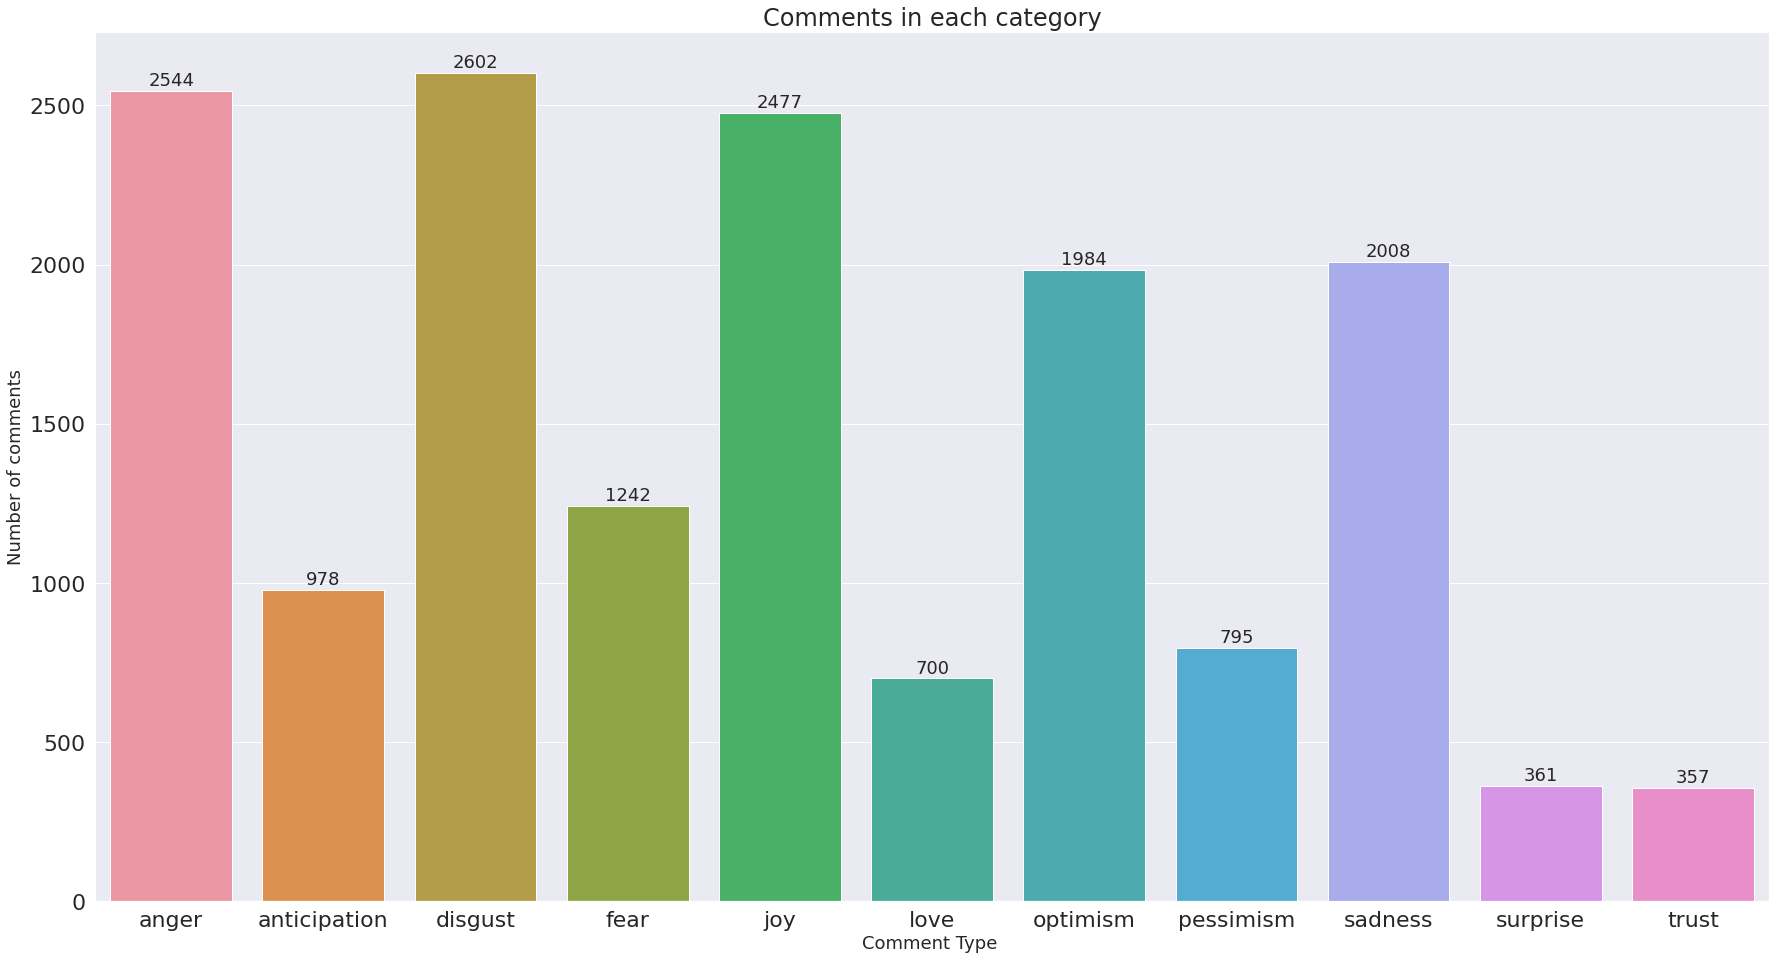

In [4]:
categories = list(data_raw.columns.values[3:])
sns.set(font_scale = 2)
plt.figure(figsize=(30,16))
ax = sns.barplot(categories, data_raw.iloc[:,3:].sum())

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum()[1:].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

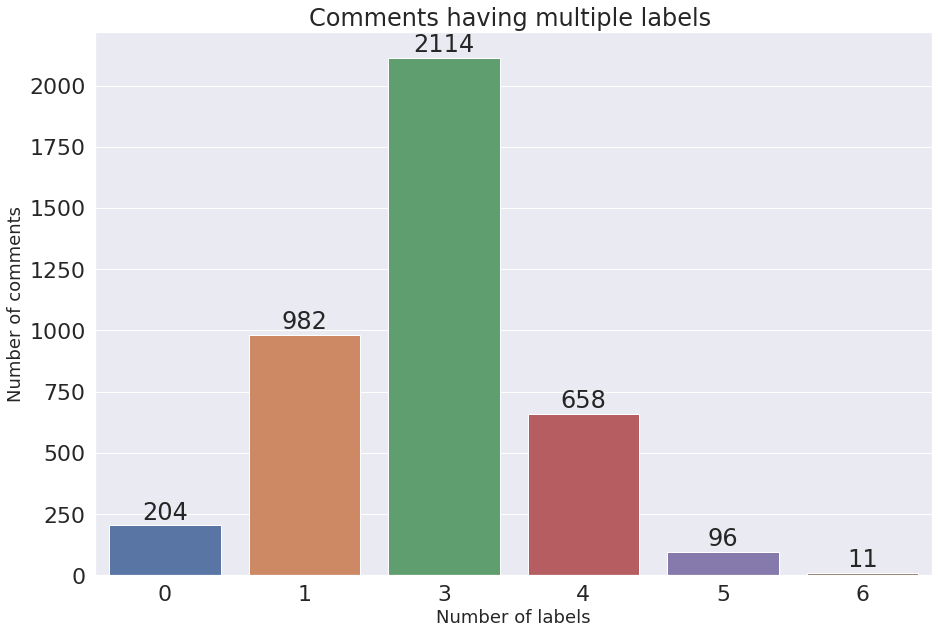

In [5]:
rowSums = data_raw.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,10))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, int(rect.get_height()), ha='center', va='bottom')

plt.show()

In [6]:
#data_raw.iloc[:,3:].sum()

#data_raw.columns.values[3:]
#data_raw.iloc[:,3:].sum(axis=1)
#print(multiLabel_counts.index)
#print(multiLabel_counts.values)
#ax.patches
#data_raw[data_raw[]]
data_raw.iloc[:,3].sum(axis=0)

2544

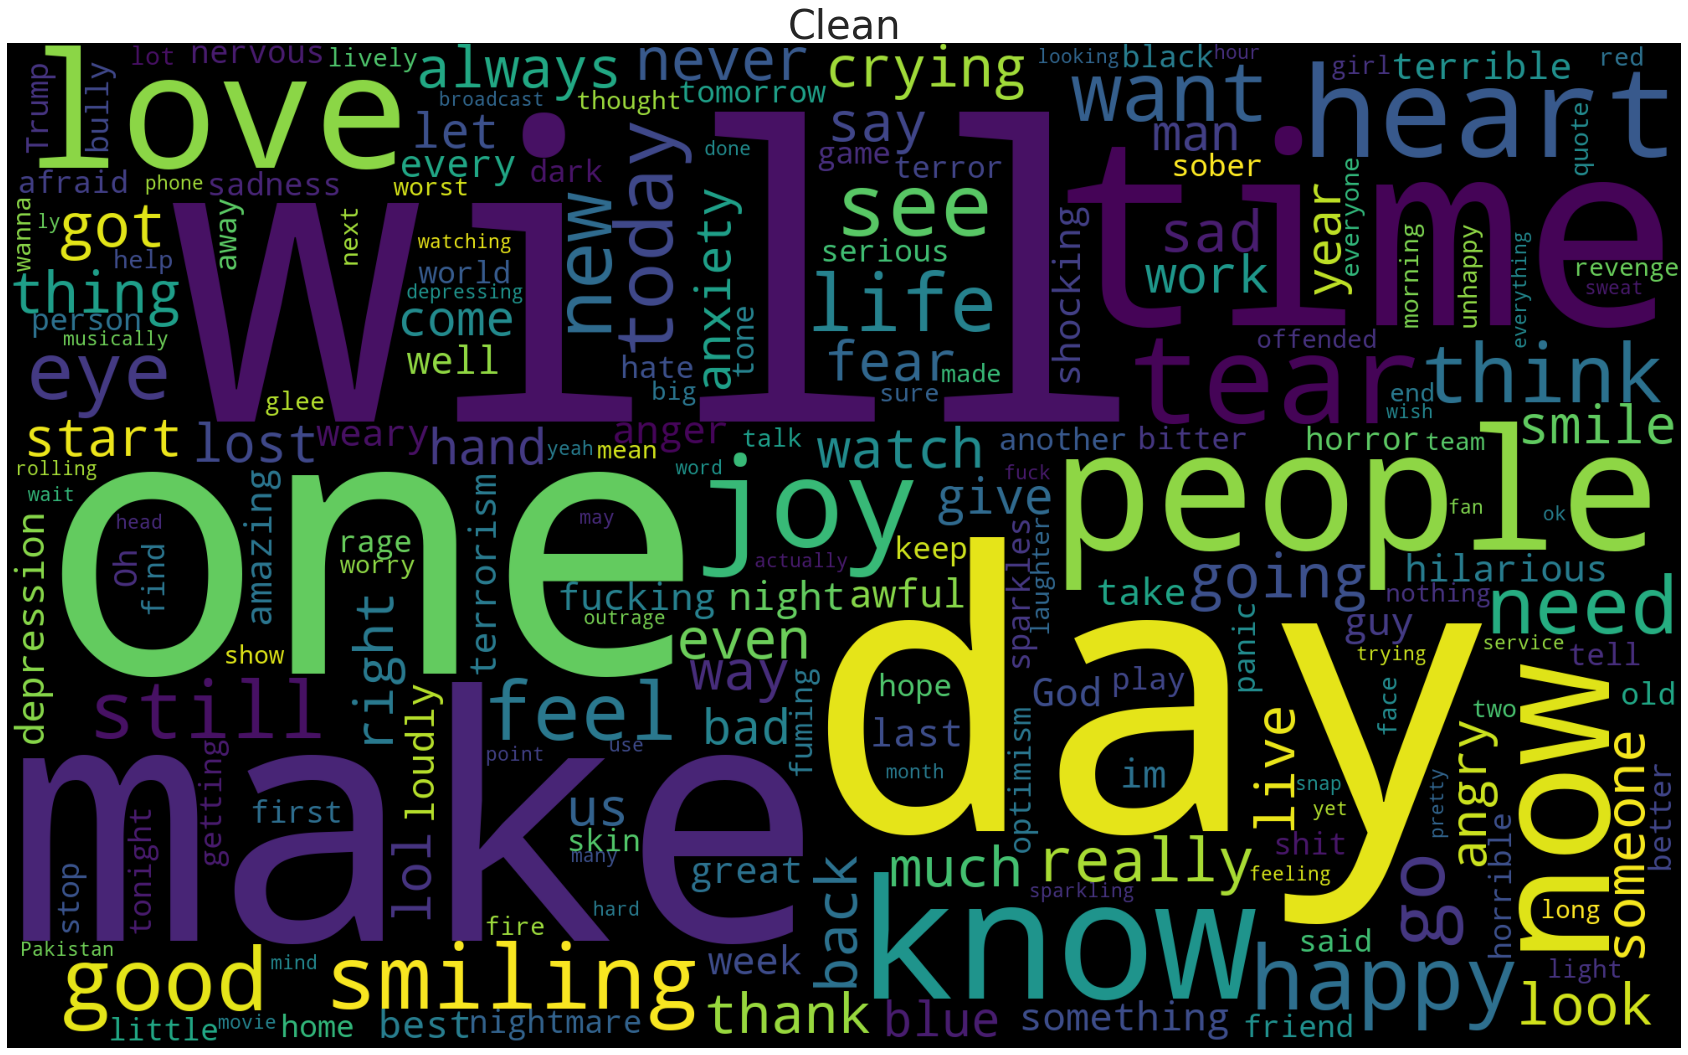

In [7]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(30,25))# clean

text = data_raw.Tweet
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2000,
                          height=1200
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)# Same code can be used to generate wordclouds of other categories

In [8]:
multi_labels = {}

for i, row in data_raw.iterrows():
    key = data_raw.columns[row == 1]
    key = ",".join(key)
    
    if '' == key or len(key.split(',')) < 2:
        continue

    if key in multi_labels:
        multi_labels[key].append(row[2])
    else:
        multi_labels[key]= [ row[2] ]

counter = []
keys = []
for i in multi_labels.keys():
    if len(multi_labels[i]) > 50:
        counter.append(len(multi_labels[i]))
        keys.append(i)
    
        






In [9]:
keys

['joy,optimism',
 'anger,disgust',
 'disgust,sadness',
 'disgust,pessimism,sadness',
 'joy,love',
 'anger,sadness',
 'anger,disgust,sadness',
 'anger,disgust,fear',
 'fear,sadness',
 'joy,love,optimism',
 'anger,disgust,fear,sadness',
 'anger,disgust,joy',
 'anticipation,joy,optimism',
 'anticipation,joy',
 'joy,optimism,trust',
 'anger,disgust,pessimism',
 'anger,disgust,pessimism,sadness',
 'fear,pessimism,sadness',
 'pessimism,sadness',
 'joy,sadness',
 'fear,pessimism']

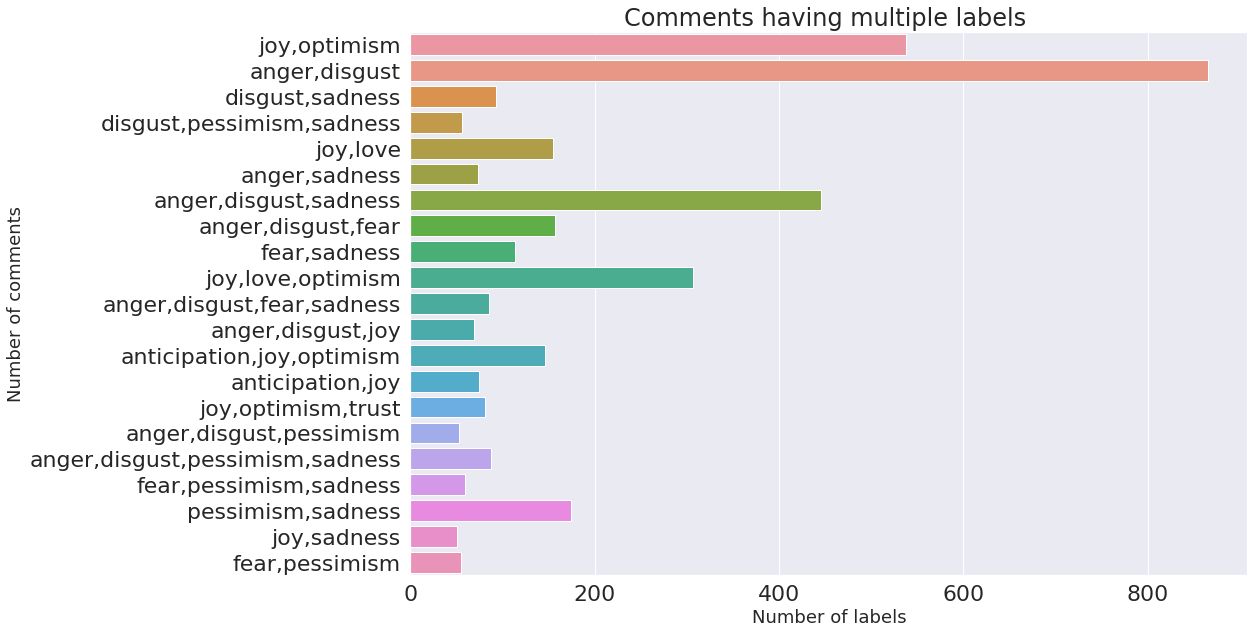

In [10]:

sns.set(font_scale = 2)
plt.figure(figsize=(15,10))
ax = sns.barplot(counter, keys)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values


plt.show()

#Word cloud of Anger and disgust

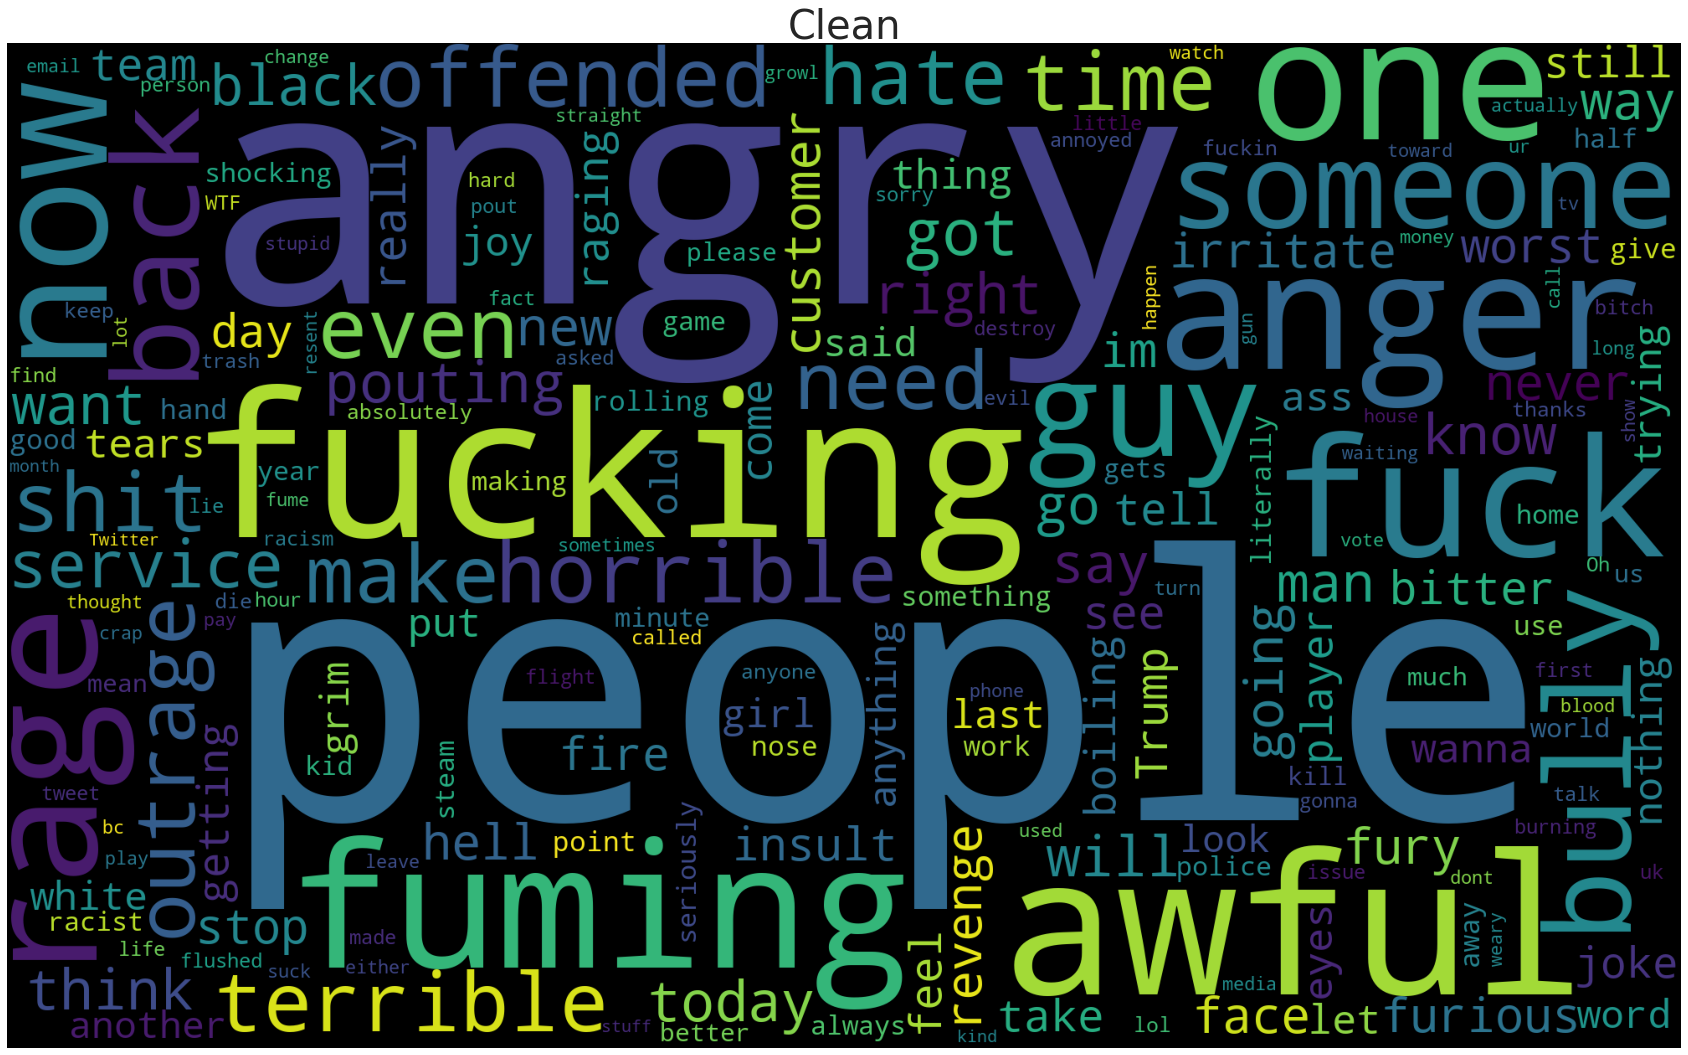

In [11]:
plt.figure(figsize=(30,25))# clean

text = data_raw.Tweet
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2000,
                          height=1200
                         ).generate(" ".join(multi_labels['anger,disgust']))
plt.axis('off')
plt.title("anger and disgust",fontsize=40)
plt.imshow(cloud_toxic)# Same code can be used to generate wordclouds of other categories

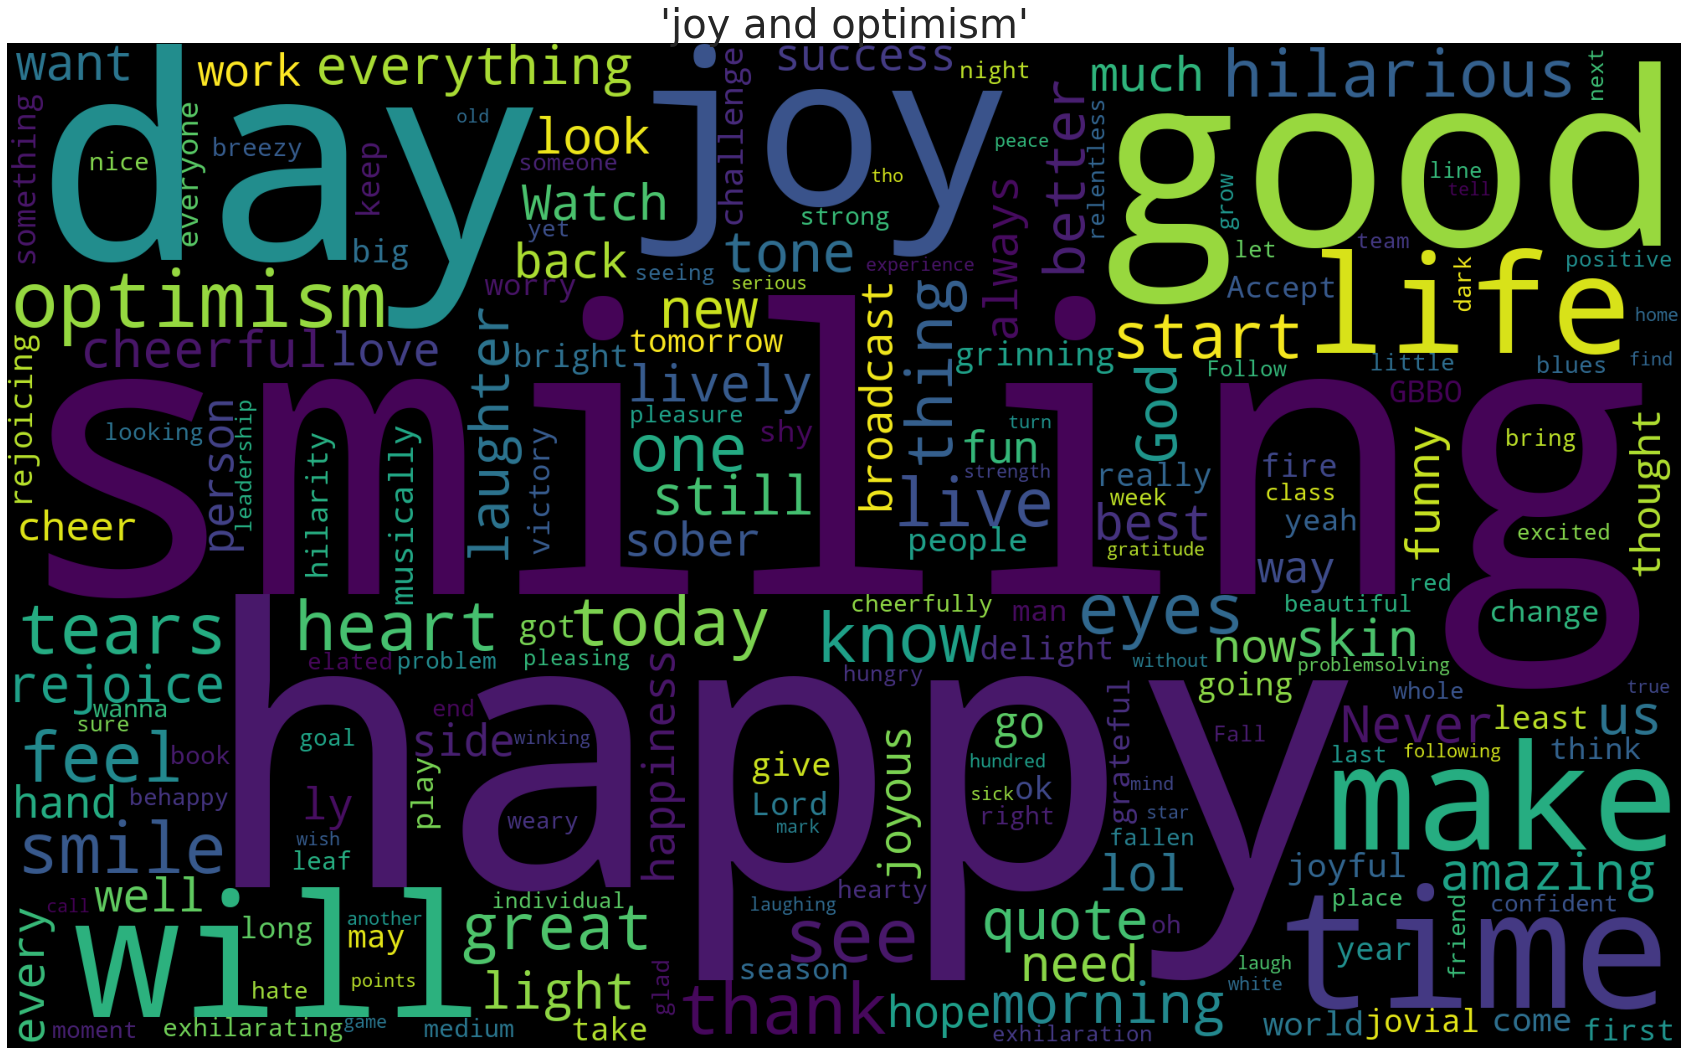

In [12]:
plt.figure(figsize=(30,25))# clean

text = data_raw.Tweet
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2000,
                          height=1200
                         ).generate(" ".join(multi_labels['joy,optimism']))
plt.axis('off')
plt.title("'joy and optimism'",fontsize=40)
plt.imshow(cloud_toxic)# Same code can be used to generate wordclouds of other categories

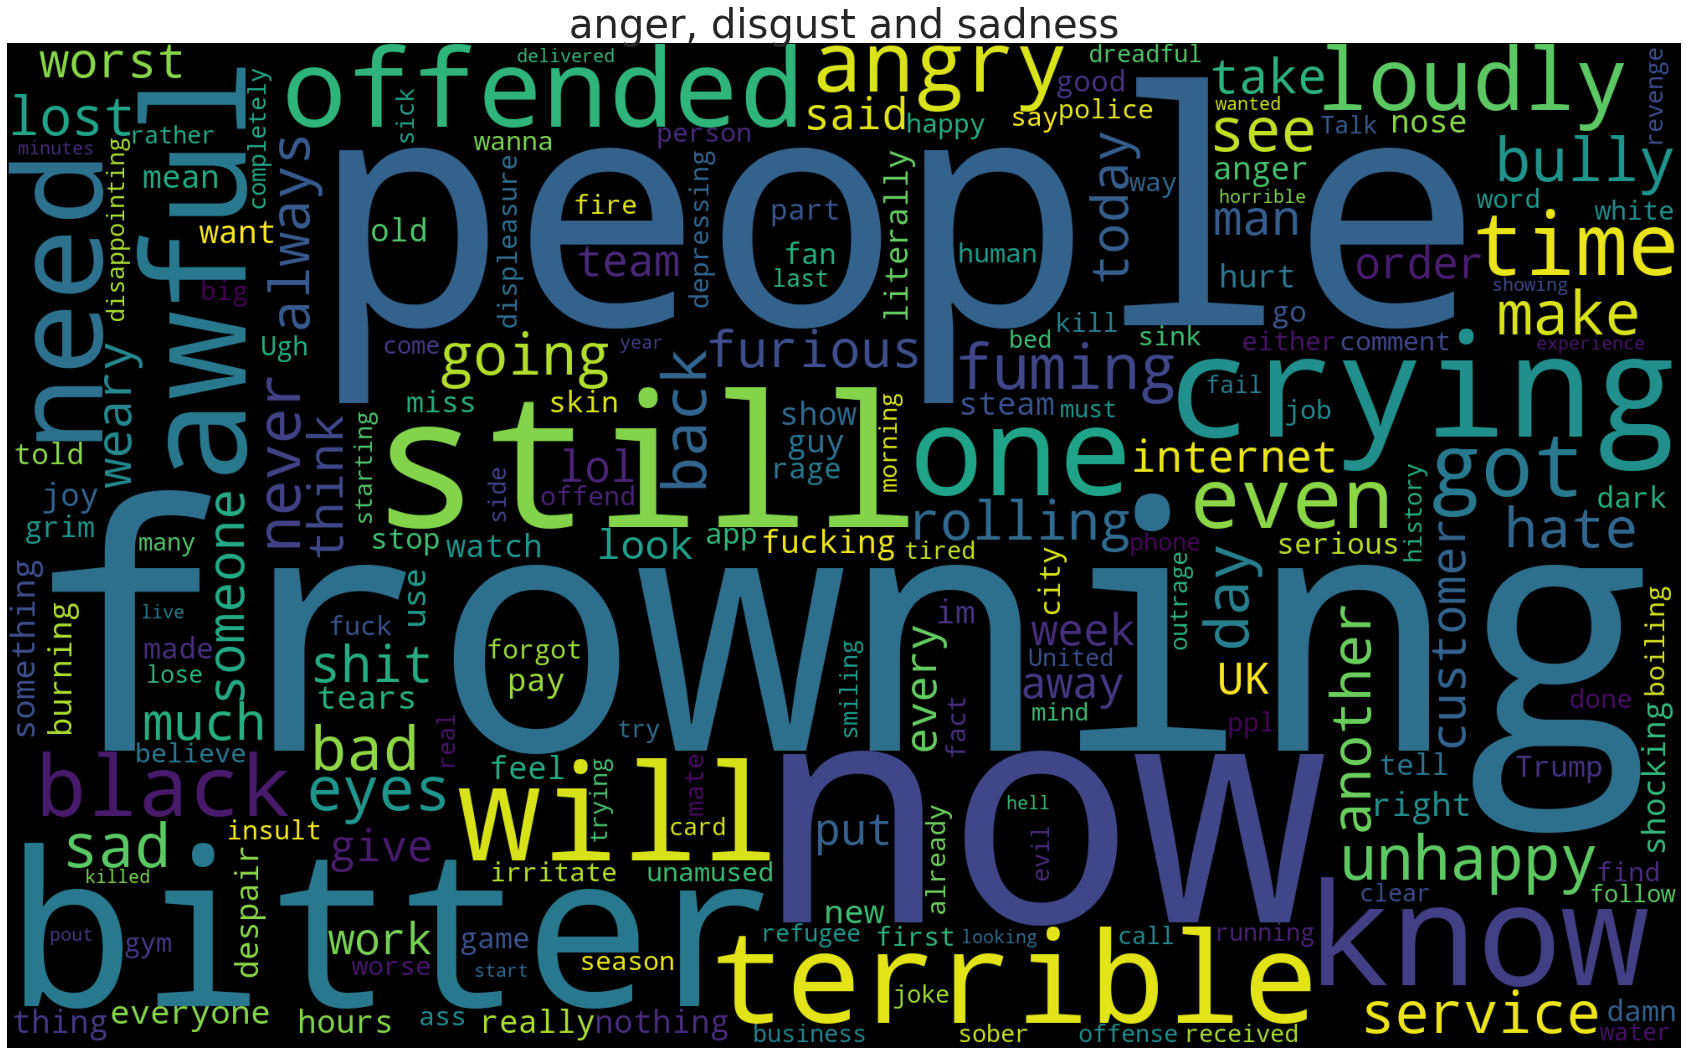

In [13]:
plt.figure(figsize=(30,25))# clean

text = data_raw.Tweet
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2000,
                          height=1200
                         ).generate(" ".join(multi_labels[ 'anger,disgust,sadness']))
plt.axis('off')
plt.title("anger, disgust and sadness",fontsize=40)
plt.imshow(cloud_toxic)# Same code can be used to generate wordclouds of other categories